In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### **Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.**

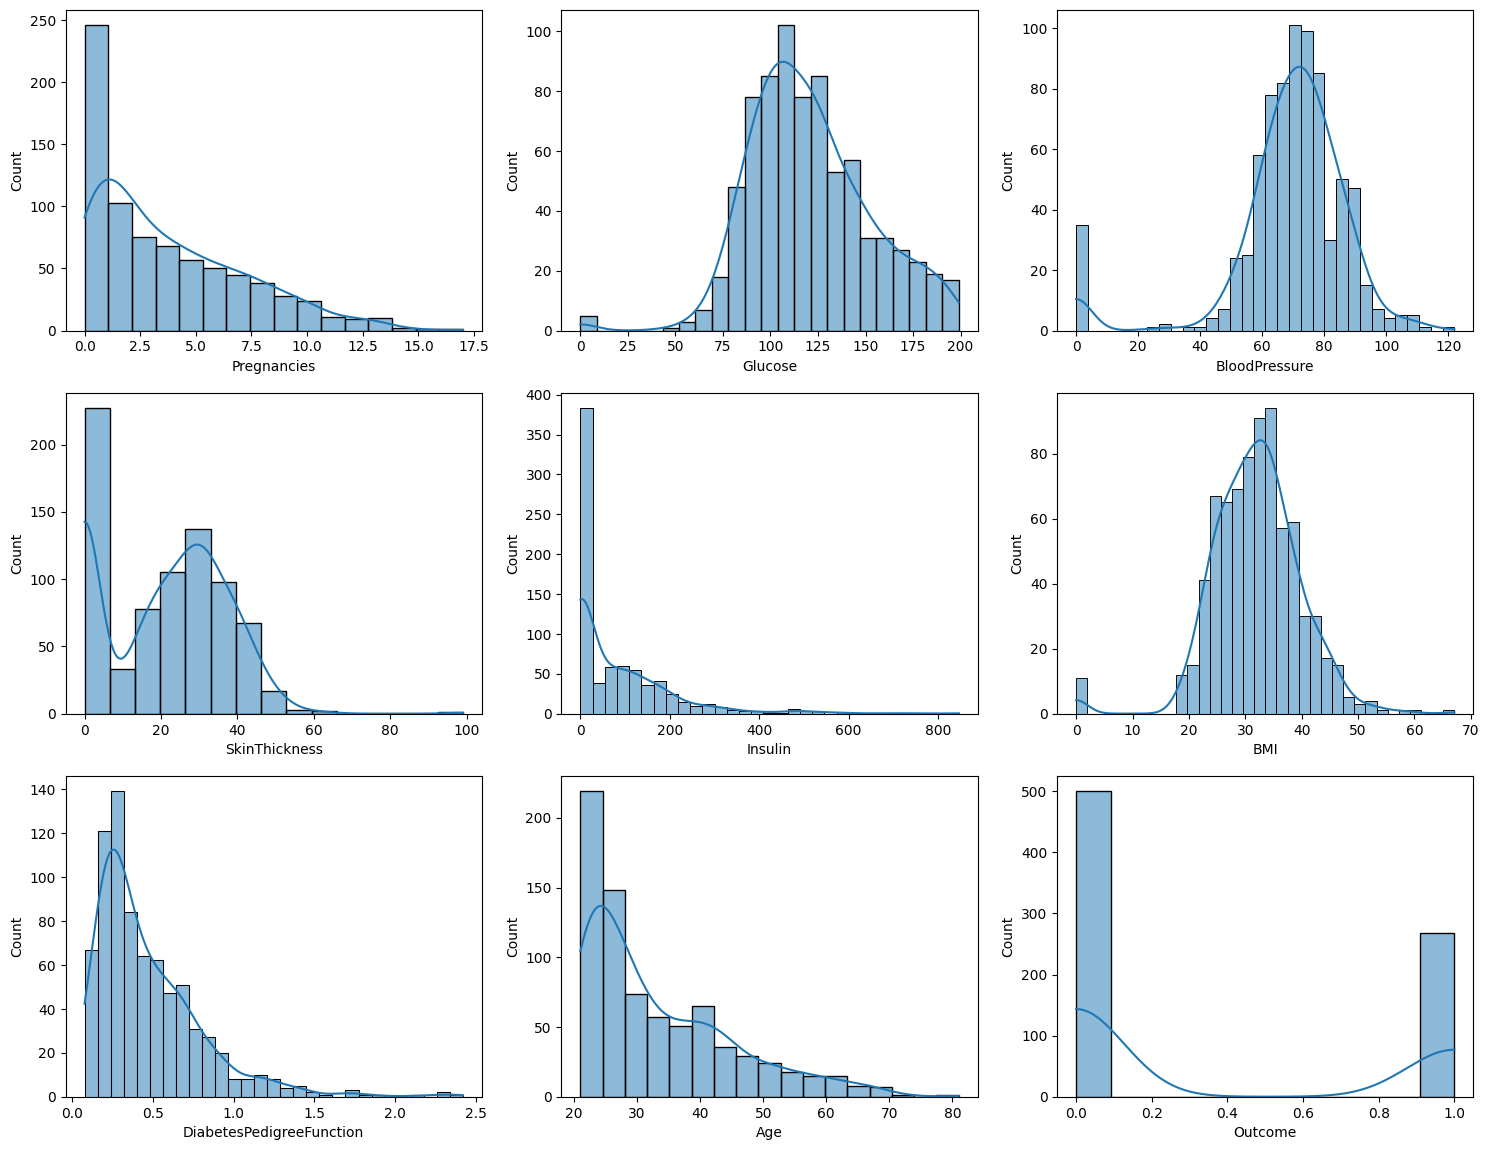

In [5]:
plt.figure(figsize=(15,15),facecolor="white")
plotnumber=1
for i in df.columns:
    ax=plt.subplot(4,3,plotnumber)
    sns.histplot(df[i],kde=True)
    plt.xlabel(i,fontsize=10)
    plotnumber +=1
plt.tight_layout()
plt.show()

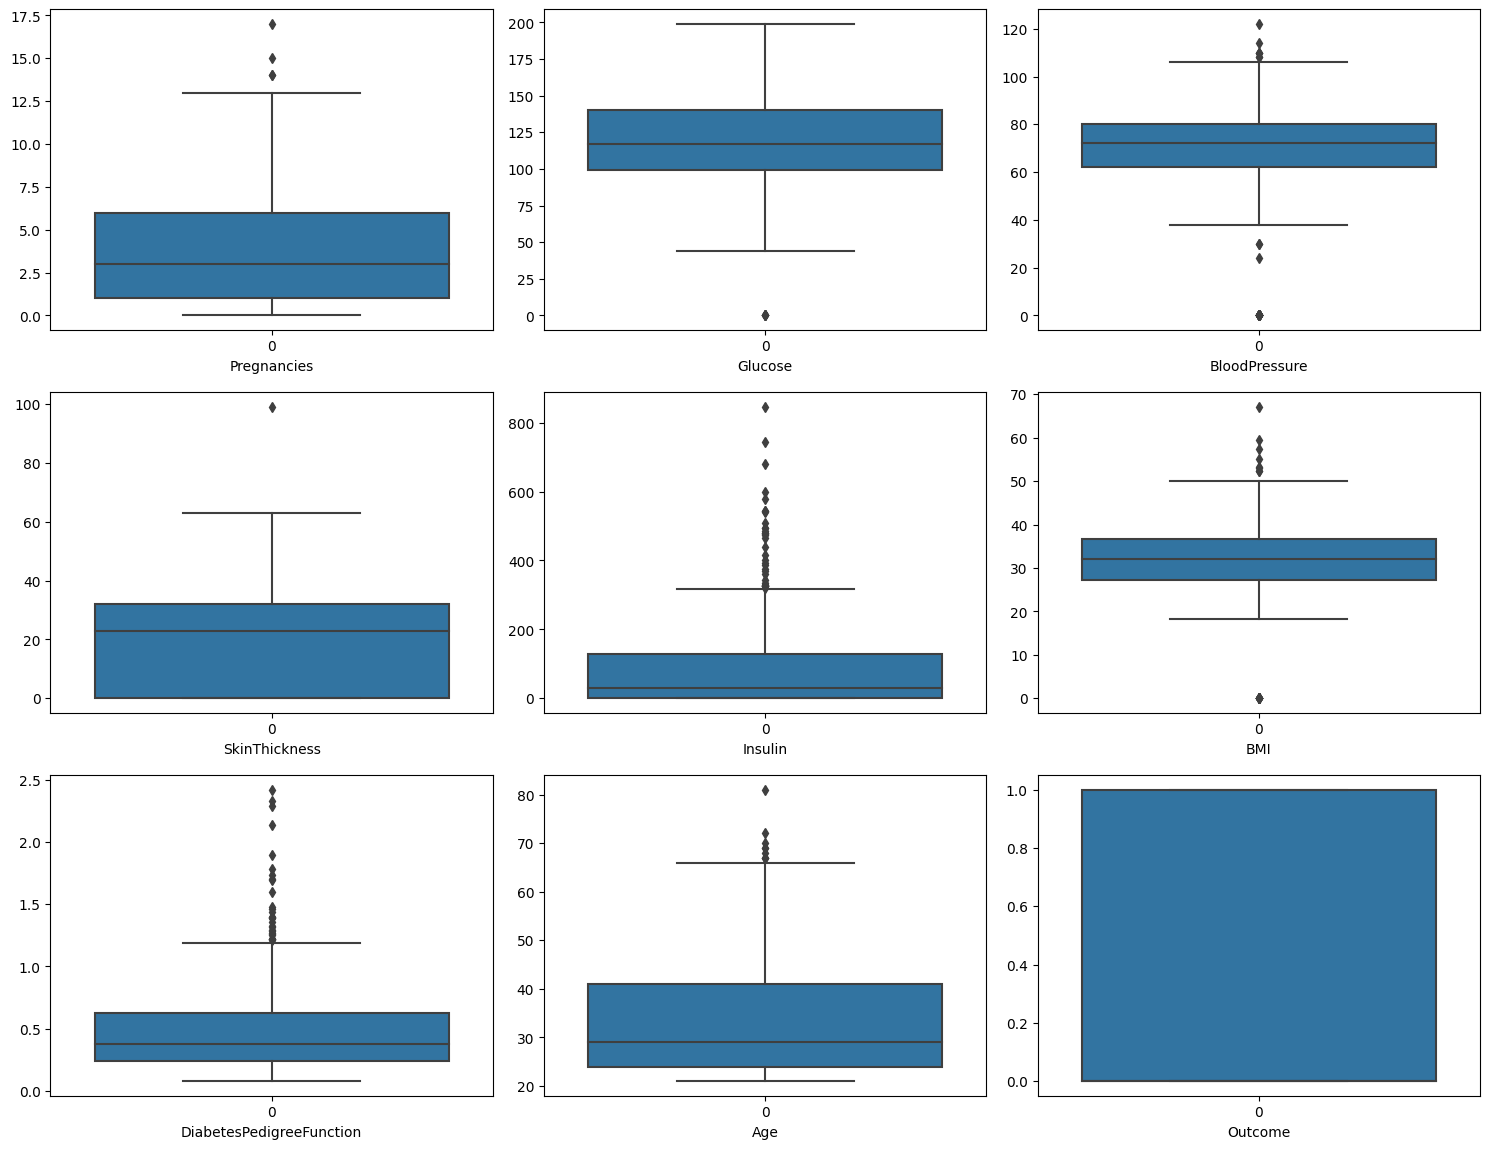

In [6]:
plt.figure(figsize=(15,15),facecolor="white")
plotnumber=1
for i in df.columns:
    ax=plt.subplot(4,3,plotnumber)
    sns.boxplot(df[i])
    plt.xlabel(i,fontsize=10)
    plotnumber +=1
plt.tight_layout()
plt.show()

<Axes: >

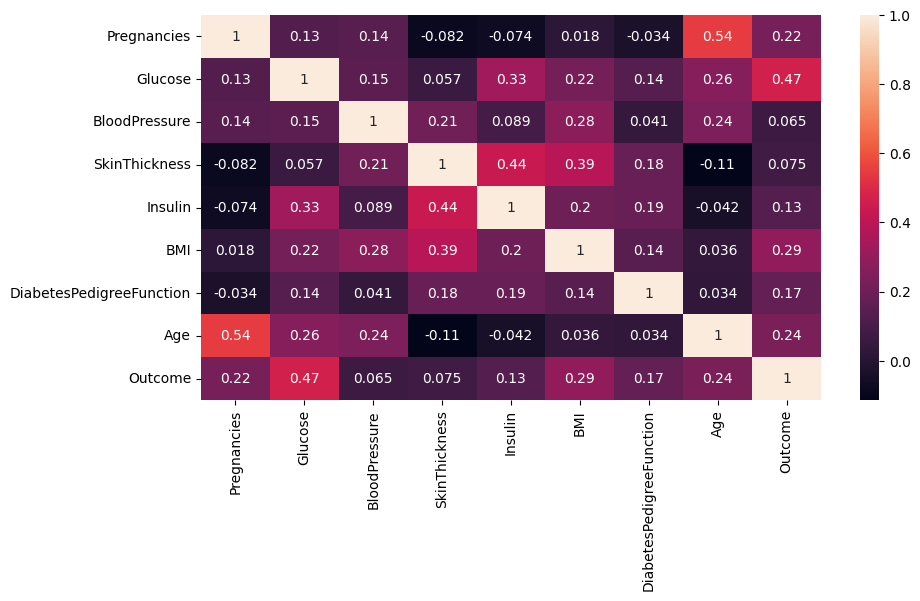

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

### **Q2:-** 
#### **Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.**

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

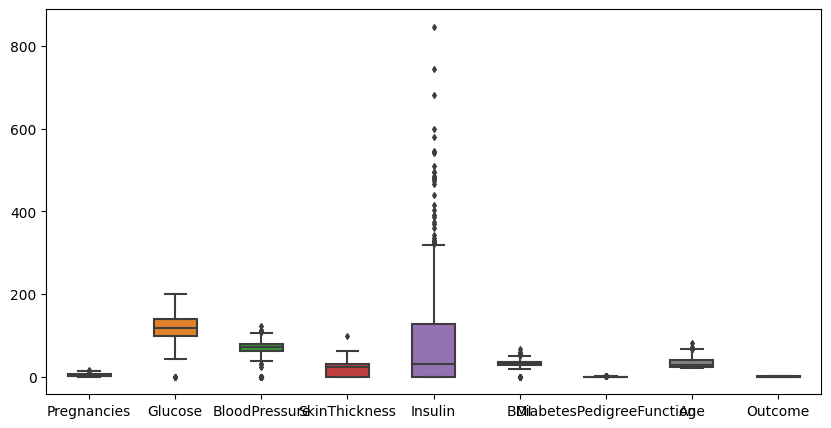

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=df, width= 0.5,ax=ax,fliersize=3)

In [11]:
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].median())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,94.652344,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,105.547598,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## **Q3:-** 
### **Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.**

In [12]:
x=df.drop(["Outcome"],axis=1)
y=df["Outcome"]

In [13]:
from sklearn.model_selection import train_test_split
import numpy as np

In [14]:
random_seed=42
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=random_seed)

## **Q4:-**
### **Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.**

In [15]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [16]:
y_pred1=model.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [18]:
print("Accuracy score",accuracy_score(y_test,y_pred1))
print("classification report\n",classification_report(y_test,y_pred1))
print("confusion matrics\n",confusion_matrix(y_test,y_pred1))

Accuracy score 0.7402597402597403
classification report
               precision    recall  f1-score   support

           0       0.82      0.76      0.79        99
           1       0.62      0.71      0.66        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.74      0.74       154

confusion matrics
 [[75 24]
 [16 39]]


In [19]:
parameter={
    "criterion":["gini", "entropy", "log_loss"],
    "splitter":["best","random"],
    "max_depth":[1,2,3,4,5,6,7,8,9,10,11,12],
    "max_features":["auto","sqrt","log2"]
}

In [20]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
greed=GridSearchCV(model,param_grid=parameter,cv=2)
greed.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [21]:
greed.best_params_

{'criterion': 'log_loss',
 'max_depth': 6,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [22]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion= 'log_loss',
max_depth= 6,
max_features='log2',
splitter='best')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=6, max_features='log2')

In [23]:
y_pred2=model.predict(x_test)

## **Q5:-** 
### **Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.**

In [24]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [25]:
print("Accuracy score",accuracy_score(y_test,y_pred2))
print("classification report\n",classification_report(y_test,y_pred2))
print("confusion matrix\n",confusion_matrix(y_test,y_pred2))

Accuracy score 0.6753246753246753
classification report
               precision    recall  f1-score   support

           0       0.76      0.72      0.74        99
           1       0.54      0.60      0.57        55

    accuracy                           0.68       154
   macro avg       0.65      0.66      0.65       154
weighted avg       0.68      0.68      0.68       154

confusion matrix
 [[71 28]
 [22 33]]


## **Q6:-** 
### **Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.**

[Text(0.6450320512820513, 0.9285714285714286, 'x[0] <= 6.5\nlog_loss = 0.931\nsamples = 614\nvalue = [401, 213]'),
 Text(0.3974358974358974, 0.7857142857142857, 'x[7] <= 28.5\nlog_loss = 0.873\nsamples = 487\nvalue = [344, 143]'),
 Text(0.20512820512820512, 0.6428571428571429, 'x[1] <= 127.5\nlog_loss = 0.694\nsamples = 300\nvalue = [244, 56]'),
 Text(0.10256410256410256, 0.5, 'x[0] <= 2.5\nlog_loss = 0.391\nsamples = 221\nvalue = [204, 17]'),
 Text(0.05128205128205128, 0.35714285714285715, 'x[2] <= 34.0\nlog_loss = 0.31\nsamples = 162\nvalue = [153, 9]'),
 Text(0.02564102564102564, 0.21428571428571427, 'x[6] <= 0.528\nlog_loss = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.01282051282051282, 0.07142857142857142, 'log_loss = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.038461538461538464, 0.07142857142857142, 'log_loss = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07692307692307693, 0.21428571428571427, 'x[3] <= 19.5\nlog_loss = 0.286\nsamples = 160\nvalue = [152, 8]'),
 Text(0.064102564

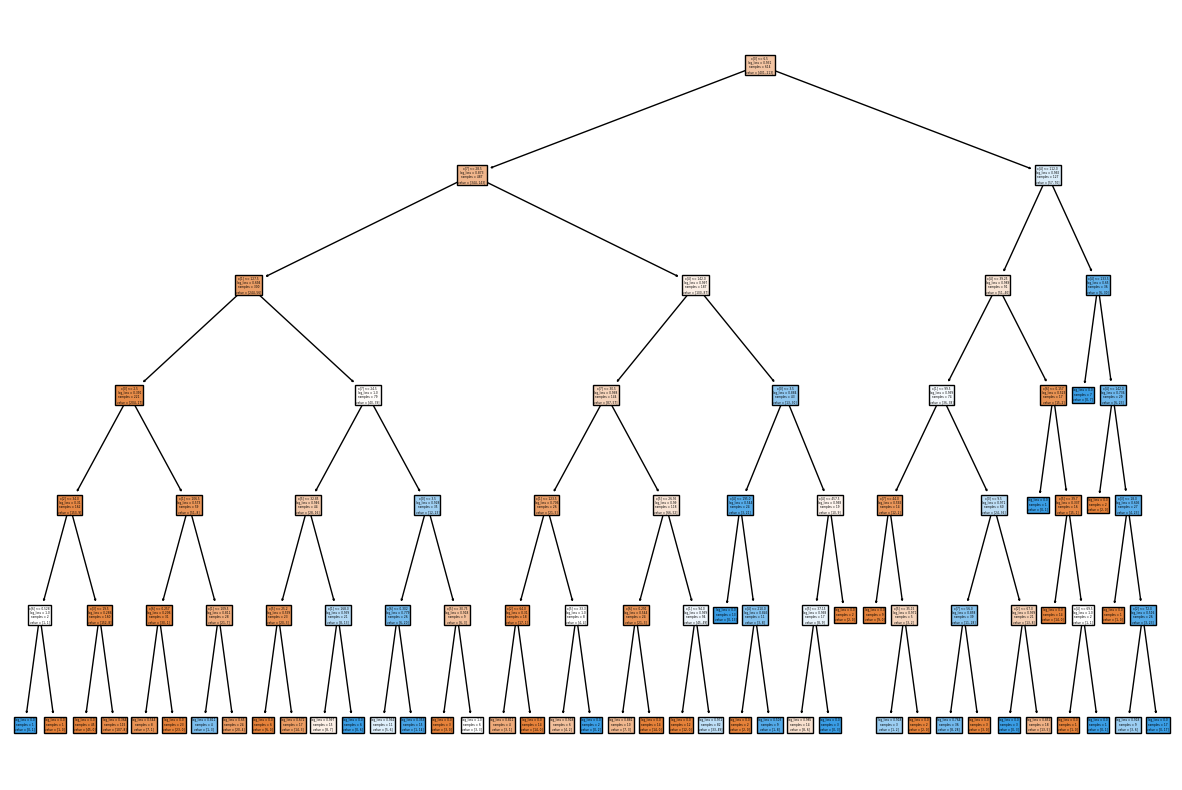

In [26]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

## **Q7:-** 
### **Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.**

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [28]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
X=df.drop(["Outcome"],axis=1)
y=df["Outcome"]


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")

Accuracy on the test set: 0.77


In [33]:
depths_to_test = [3, 5, 7, 10, None]  # Vary the tree depth, including no depth limit (None)
for depth in depths_to_test:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with max_depth={depth}: {accuracy:.2f}")

Accuracy with max_depth=3: 0.76
Accuracy with max_depth=5: 0.79
Accuracy with max_depth=7: 0.73
Accuracy with max_depth=10: 0.76
Accuracy with max_depth=None: 0.73


In [34]:
new_data={'Pregnancies':[1,2,3,2,2,1], 'Glucose':[130,120,180,190,170,196],
    'BloodPressure':[72,66,78,98,67,90], 
    'SkinThickness':[35,34,43,36,29,30],
    'Insulin':[76,57,56,67,5,34],
    'BMI':[33.6,26.6,23.3,28.1,43.1,34.23], 
    'DiabetesPedigreeFunction':[0.656,0.345,0.645,0.357,0.547,0.347],
    'Age':[45,34,54,34,54,53],
    "Outcome":[1,0,0,1,0,1]
}
new_data=pd.DataFrame(new_data)
new_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,130,72,35,76,33.6,0.656,45,1
1,2,120,66,34,57,26.6,0.345,34,0
2,3,180,78,43,56,23.3,0.645,54,0
3,2,190,98,36,67,28.1,0.357,34,1
4,2,170,67,29,5,43.1,0.547,54,0


In [35]:
X_new_data, y_new_data =new_data.drop(["Outcome"],axis=1),new_data["Outcome"]

In [36]:
y_new_pred = model.predict(X_new_data)
new_data_accuracy = accuracy_score(y_new_data, y_new_pred)
print(f"Accuracy on out-of-distribution data: {new_data_accuracy:.2f}")


Accuracy on out-of-distribution data: 0.67
